In [4]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sympy import init_printing
init_printing(use_latex='mathjax')
from sympy import pprint

In [2]:
def qWalkCoin(x0,steps,storeCount=2):
    states=[]
    cur=x0.copy()
    rule={"up":1,"down":-1}
    for i in range(steps):
        if i%storeCount==0:
            states.append(cur.copy())
        adder=[]
        for k in cur.keys():
            vNew=k[1]+rule[k[0]]
            #print(f"k {k} \n vNew: {vNew}\n\n")
            nex={("up",vNew):1/np.sqrt(2)*cur[k], ("down",vNew):rule[k[0]]/np.sqrt(2)*cur[k]} ##future recursive thread
            adder.append(nex)
        cur=dict()
        for j in adder:
            for newState in j.keys():
                if newState in cur:
                    supPos=cur[newState]+j[newState]
                    if np.isclose(np.absolute(supPos),0):
                        cur.pop(newState)
                    else:
                        cur[newState]=supPos
                else:
                    cur[newState]=j[newState].copy()
            ##normalize
        c=np.sum([np.absolute(v)**2 for v in cur.values()])
        cur={k:v/np.sqrt(c) for k,v in cur.items()}
    return states

In [207]:
x0={("down",0):1}
p2=qWalkCoin(x0,101,1)

In [208]:
eX2[1]

2.0000000000000004

In [209]:
eX=[sum(np.sum([np.absolute(v)**2 for k,v in l.items() if k[1]==s[1]])*s[1] for s in l.keys()) for l in p2]
eX2=[sum(np.sum([np.absolute(v)**2 for k,v in l.items() if k[1]==s[1]])*s[1]**2 for s in l.keys()) for l in p2]

In [210]:
varq1=[i-j**2 for i,j in zip(eX2,eX)]

In [180]:
l=p2[-1]
dat={s[1]:np.sum([np.absolute(v)**2 for k,v in l.items() if k[1]==s[1]]) for s in l.keys()}


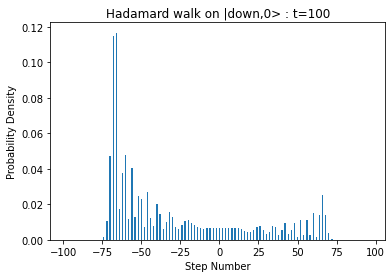

In [181]:
fig=plt.figure()

ax=fig.add_subplot()
steps=np.arange(21,dtype=int)
ax.set_title("Hadamard walk on |down,0> : t=100")
ax.bar([k for k in dat.keys() if k%2==0],[dat[k] for k in dat.keys() if k%2==0])


plt.xlabel("Step Number")
plt.ylabel("Probability Density")
plt.show()


In [183]:
x0={("up",0):1/np.sqrt(2),("down",0):1/np.sqrt(2)*1j}

p2=qWalkCoin(x0,101,1)

In [184]:
l=p2[-1]
dat={s[1]:np.sum([np.absolute(v)**2 for k,v in l.items() if k[1]==s[1]]) for s in l.keys()}


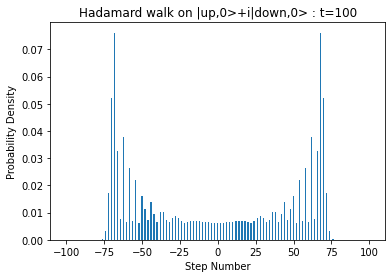

In [186]:
fig=plt.figure()

ax=fig.add_subplot()
steps=np.arange(21,dtype=int)
ax.set_title("Hadamard walk on |up,0>+i|down,0> : t=100")
ax.bar([k for k in dat.keys() if k%2==0],[dat[k] for k in dat.keys() if k%2==0])


plt.xlabel("Step Number")
plt.ylabel("Probability Density")
plt.show()


In [187]:
eX=[sum(np.sum([np.absolute(v)**2 for k,v in l.items() if k[1]==s[1]])*s[1] for s in l.keys()) for l in p2]
eX2=[sum(np.sum([np.absolute(v)**2 for k,v in l.items() if k[1]==s[1]])*s[1]**2 for s in l.keys()) for l in p2]

In [188]:
varq2=[i-j**2 for i,j in zip(eX2,eX)]

In [201]:
varClass=[0]
varClass.extend([t/4 for t in range(len(eX)-1)])

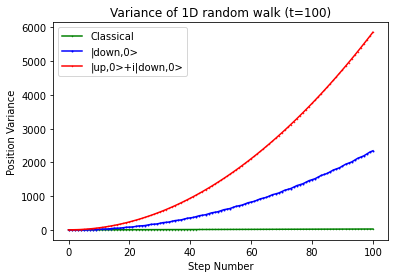

In [212]:
fig=plt.figure()

ax=fig.add_subplot()
ax.set_title("Variance of 1D random walk (t=100)")
t=list(range(len(varq2)))
ax.plot(varClass,color="g",marker=".",markersize=1)
ax.plot(varq1,color="b",marker="o",markersize=1)
ax.plot(varq2,color="r",marker=".",markersize=1)
ax.legend(["Classical","|down,0>","|up,0>+i|down,0>"])

plt.xlabel("Step Number")
plt.ylabel("Position Variance")
plt.show()


In [200]:
len(varq2)==len(varq1)==len(varClass)

False

In [ ]:
v1=p2[2][('up',3)]
v2=p2[2][("up",-3)]


In [ ]:
print(f"{v1}   {v2} ")

In [ ]:
print(f"{np.absolute(v1)**2}   {np.absolute(v2)**2} ")

In [ ]:
{s[1]:np.sum([np.absolute(v)**2 for k,v in p2[2].items() if k[1]==s[1]]) for s in p2[2].keys()}

In [ ]:
l=p2[1]
dat={s[1]:np.sum([np.absolute(v)**2 for k,v in l.items() if k[1]==s[1]]) for s in l.keys()}

In [ ]:
dat

In [ ]:
1/32

In [16]:
y,N=sym.symbols("y,N")
H=sym.Matrix([[-1,-y*sym.sqrt((N-1))],[-y*sym.sqrt((N-1)),0]])

In [17]:
ev=H.eigenvects()

In [18]:
ev

⎡⎛                                 ⎡⎡ ⎛     ___________________    ⎞ ⎤⎤⎞  ⎛   
⎢⎜                                 ⎢⎢ ⎜    ╱      2      2         ⎟ ⎥⎥⎟  ⎜   
⎢⎜     ___________________         ⎢⎢ ⎜  ╲╱  4⋅N⋅y  - 4⋅y  + 1    1⎟ ⎥⎥⎟  ⎜   
⎢⎜    ╱      2      2              ⎢⎢-⎜- ────────────────────── - ─⎟ ⎥⎥⎟  ⎜  ╱
⎢⎜  ╲╱  4⋅N⋅y  - 4⋅y  + 1    1     ⎢⎢ ⎝            2              2⎠ ⎥⎥⎟  ⎜╲╱ 
⎢⎜- ────────────────────── - ─, 1, ⎢⎢────────────────────────────────⎥⎥⎟, ⎜───
⎢⎜            2              2     ⎢⎢              _______           ⎥⎥⎟  ⎜   
⎢⎜                                 ⎢⎢          y⋅╲╱ N - 1            ⎥⎥⎟  ⎜   
⎢⎜                                 ⎢⎢                                ⎥⎥⎟  ⎜   
⎣⎝                                 ⎣⎣               1                ⎦⎦⎠  ⎝   

                            ⎡⎡ ⎛   ___________________    ⎞ ⎤⎤⎞⎤
                            ⎢⎢ ⎜  ╱      2      2         ⎟ ⎥⎥⎟⎥
___________________         ⎢⎢ ⎜╲╱  4⋅N⋅y  - 4⋅y  + 1    1⎟ ⎥⎥⎟⎥
      2      2

In [14]:
H.eigenvals()

⎧     _____________________________            _____________________________  
⎪    ╱    2  2        2      2                ╱    2  2        2      2       
⎨  ╲╱  4⋅N ⋅y  - 8⋅N⋅y  + 4⋅y  + 1    1     ╲╱  4⋅N ⋅y  - 8⋅N⋅y  + 4⋅y  + 1   
⎪- ──────────────────────────────── - ─: 1, ──────────────────────────────── -
⎩                 2                   2                    2                  

     ⎫
     ⎪
 1   ⎬
 ─: 1⎪
 2   ⎭

In [25]:
x=np.matrix([[0,1],[1,0]])

In [30]:
((x*1j)).dot(x).dot(x*1j)

matrix([[ 0.+0.j, -1.+0.j],
        [-1.+0.j,  0.+0.j]])

In [ ]:
P=sym.Matrix([])

In [39]:
S="XZZXI"
stabs=[S]

In [40]:
for s in range(4):
    stabs.append(stabs[-1][-1]+stabs[-1][:-1])

In [41]:
stabs # cyclic Abelian stabilizers

['XZZXI', 'IXZZX', 'XIXZZ', 'ZXIXZ', 'ZZXIX']

In [55]:
pauli=("X","Y","Z")
errs=[(opA+str(i),opB+str(j)) for opA in pauli for opB in pauli for i in range(2) for j in range(5)]

In [62]:
lie=lambda s1,s2: {i for i in pauli if i!=s1 and i!=s2}.pop()

In [64]:
lie("Y","Z") #neg not req in this case

'X'

In [80]:
eMatch=dict()
for e in errs:
    matched=False
    i=0
    e0,e1=e
    n0=int(e0[1])
    n1=int(e1[1])
    if n0==n1:
        if e0[0]==e1[0]:
            matchStab="Redundant"
            matched =True
        e0=lie(e0[0],e1[0])
        while not matched:
            s=stabs[i]
            if s[n0]!=e0 and s[n0]!="I":
                #print(n0)
                #print(s[n0])
                #print("ho\n\n")
                matchStab=i ##add one in table
                matched=True
            i+=1
            
    while not matched:
        s=stabs[i]
        c=0
        if s[n0]!=e0[0] and s[n0]!="I":
            c+=1
        if s[n1]!=e1[0] and s[n1]!="I":
            c+=1
        if c%2==1:
            matchStab=i
            matched=True
        i+=1
    eMatch[e]=matchStab

In [71]:
eMatch

{('X0', 'X0'): 'I',
 ('X0', 'X1'): 0,
 ('X0', 'X2'): 0,
 ('X0', 'X3'): 1,
 ('X0', 'X4'): 2,
 ('X1', 'X0'): 0,
 ('X1', 'X1'): 'I',
 ('X1', 'X2'): 1,
 ('X1', 'X3'): 0,
 ('X1', 'X4'): 0,
 ('X0', 'Y0'): 0,
 ('X0', 'Y1'): 0,
 ('X0', 'Y2'): 0,
 ('X0', 'Y3'): 0,
 ('X0', 'Y4'): 1,
 ('X1', 'Y0'): 2,
 ('X1', 'Y1'): 1,
 ('X1', 'Y2'): 1,
 ('X1', 'Y3'): 1,
 ('X1', 'Y4'): 0,
 ('X0', 'Z0'): 0,
 ('X0', 'Z1'): 1,
 ('X0', 'Z2'): 2,
 ('X0', 'Z3'): 0,
 ('X0', 'Z4'): 1,
 ('X1', 'Z0'): 2,
 ('X1', 'Z1'): 0,
 ('X1', 'Z2'): 0,
 ('X1', 'Z3'): 3,
 ('X1', 'Z4'): 0,
 ('Y0', 'X0'): 0,
 ('Y0', 'X1'): 2,
 ('Y0', 'X2'): 1,
 ('Y0', 'X3'): 0,
 ('Y0', 'X4'): 0,
 ('Y1', 'X0'): 0,
 ('Y1', 'X1'): 1,
 ('Y1', 'X2'): 3,
 ('Y1', 'X3'): 0,
 ('Y1', 'X4'): 0,
 ('Y0', 'Y0'): 'I',
 ('Y0', 'Y1'): 1,
 ('Y0', 'Y2'): 1,
 ('Y0', 'Y3'): 1,
 ('Y0', 'Y4'): 0,
 ('Y1', 'Y0'): 1,
 ('Y1', 'Y1'): 'I',
 ('Y1', 'Y2'): 2,
 ('Y1', 'Y3'): 2,
 ('Y1', 'Y4'): 0,
 ('Y0', 'Z0'): 3,
 ('Y0', 'Z1'): 0,
 ('Y0', 'Z2'): 0,
 ('Y0', 'Z3'): 2,
 ('Y0', 'Z4'): 0,
 (

In [127]:
p00,p01,p10,p11=sym.symbols("p00,p01,p10,p11")
symType=type(p00)
pA=sym.Matrix([[p00,p01],[p10,p11]])

pauliX=sym.Matrix([[0,1],[1,0]])
pauliY=sym.Matrix([[0,-1j],[1j,0]])
pauliZ=sym.Matrix([[1,0],[0,-1]])
paulis=[pauliX,pauliY,pauliZ]

In [77]:
pauliX*pauliZ

⎡0  -1⎤
⎢     ⎥
⎣1  0 ⎦

In [78]:
pauliY

⎡  0    -1.0⋅ⅈ⎤
⎢             ⎥
⎣1.0⋅ⅈ    0   ⎦

In [106]:
outTable=r"\begin{tabular}{||c |c ||} \hline "

outTable+="Operator $E_{j}^{\dagger}E_i$ & Anticommutes with " #col headers
outTable+= r"\\ [0.5ex] \n \hline "

In [146]:
outTable=""

for e,v in eMatch.items():
    #outTable+=r"\n \hline \n "
    if v!="Redundant":
        v=f"g_{v+1}"
    outTable+=f"${e[1][0]}_{int(e[1][1])+1}{e[0][0]}_{int(e[0][1])+1}$ & $ {v} $"
    outTable+=r"\\"
    #outTable+=r"\\ \n \hline "
#outTable+=r" \n \end{tabular}"

In [147]:
open("stabilizerTable.txt","w").write(outTable)

1836

In [149]:
s2=np.sqrt(2)

(9*4+9*30+9*16)/8

56.25

In [158]:
(1/8*(9+3*6+9))

4.5

In [155]:
(2/9)**3*56.25

0.6172839506172838

In [108]:
for e,v in eMatch.items():
    print(e)
    print(v)

('X0', 'X0')
Redundant
('X0', 'X1')
0
('X0', 'X2')
0
('X0', 'X3')
1
('X0', 'X4')
2
('X1', 'X0')
0
('X1', 'X1')
Redundant
('X1', 'X2')
1
('X1', 'X3')
0
('X1', 'X4')
0
('X0', 'Y0')
0
('X0', 'Y1')
0
('X0', 'Y2')
0
('X0', 'Y3')
0
('X0', 'Y4')
1
('X1', 'Y0')
2
('X1', 'Y1')
1
('X1', 'Y2')
1
('X1', 'Y3')
1
('X1', 'Y4')
0
('X0', 'Z0')
0
('X0', 'Z1')
1
('X0', 'Z2')
2
('X0', 'Z3')
0
('X0', 'Z4')
1
('X1', 'Z0')
2
('X1', 'Z1')
0
('X1', 'Z2')
0
('X1', 'Z3')
3
('X1', 'Z4')
0
('Y0', 'X0')
0
('Y0', 'X1')
2
('Y0', 'X2')
1
('Y0', 'X3')
0
('Y0', 'X4')
0
('Y1', 'X0')
0
('Y1', 'X1')
1
('Y1', 'X2')
3
('Y1', 'X3')
0
('Y1', 'X4')
0
('Y0', 'Y0')
Redundant
('Y0', 'Y1')
1
('Y0', 'Y2')
1
('Y0', 'Y3')
1
('Y0', 'Y4')
0
('Y1', 'Y0')
1
('Y1', 'Y1')
Redundant
('Y1', 'Y2')
2
('Y1', 'Y3')
2
('Y1', 'Y4')
0
('Y0', 'Z0')
3
('Y0', 'Z1')
0
('Y0', 'Z2')
0
('Y0', 'Z3')
2
('Y0', 'Z4')
0
('Y1', 'Z0')
1
('Y1', 'Z1')
0
('Y1', 'Z2')
0
('Y1', 'Z3')
1
('Y1', 'Z4')
0
('Z0', 'X0')
0
('Z0', 'X1')
2
('Z0', 'X2')
1
('Z0', 'X3')
0
('Z0', '

In [122]:
outTable

'\\begin{tabular}{||c |c ||} \\hline Operator $E_{j}^{\\dagger}E_i$ & Anticommutes with \\\\ [0.5ex] \\n \\hline \\n \\hline \\n $X_0X_0$ & Redundant \\\\ \\n \\hline \\n \\hline \\n $X_1X_0$ & 0 \\\\ \\n \\hline \\n \\hline \\n $X_2X_0$ & 0 \\\\ \\n \\hline \\n \\hline \\n $X_3X_0$ & 1 \\\\ \\n \\hline \\n \\hline \\n $X_4X_0$ & 2 \\\\ \\n \\hline \\n \\hline \\n $X_0X_1$ & 0 \\\\ \\n \\hline \\n \\hline \\n $X_1X_1$ & Redundant \\\\ \\n \\hline \\n \\hline \\n $X_2X_1$ & 1 \\\\ \\n \\hline \\n \\hline \\n $X_3X_1$ & 0 \\\\ \\n \\hline \\n \\hline \\n $X_4X_1$ & 0 \\\\ \\n \\hline \\n \\hline \\n $Y_0X_0$ & 0 \\\\ \\n \\hline \\n \\hline \\n $Y_1X_0$ & 0 \\\\ \\n \\hline \\n \\hline \\n $Y_2X_0$ & 0 \\\\ \\n \\hline \\n \\hline \\n $Y_3X_0$ & 0 \\\\ \\n \\hline \\n \\hline \\n $Y_4X_0$ & 1 \\\\ \\n \\hline \\n \\hline \\n $Y_0X_1$ & 2 \\\\ \\n \\hline \\n \\hline \\n $Y_1X_1$ & 1 \\\\ \\n \\hline \\n \\hline \\n $Y_2X_1$ & 1 \\\\ \\n \\hline \\n \\hline \\n $Y_3X_1$ & 1 \\\\ \\n \\hli

In [110]:
import pandas as pd


In [116]:
dat=pd.DataFrame.from_dict(eMatch,orient="index")

In [117]:
dat

,0
"(X0, X0)",Redundant
"(X0, X1)",0
"(X0, X2)",0
"(X0, X3)",1
"(X0, X4)",2
...,...
"(Z1, Z0)",0
"(Z1, Z1)",Redundant
"(Z1, Z2)",1
"(Z1, Z3)",0


In [120]:
dat.to_latex()

C:\Users\Seth\AppData\Local\Temp/ipykernel_15740/1327489656.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  dat.to_latex()


'\\begin{tabular}{ll}\n\\toprule\n{} &          0 \\\\\n\\midrule\n(X0, X0) &  Redundant \\\\\n(X0, X1) &          0 \\\\\n(X0, X2) &          0 \\\\\n(X0, X3) &          1 \\\\\n(X0, X4) &          2 \\\\\n(X1, X0) &          0 \\\\\n(X1, X1) &  Redundant \\\\\n(X1, X2) &          1 \\\\\n(X1, X3) &          0 \\\\\n(X1, X4) &          0 \\\\\n(X0, Y0) &          0 \\\\\n(X0, Y1) &          0 \\\\\n(X0, Y2) &          0 \\\\\n(X0, Y3) &          0 \\\\\n(X0, Y4) &          1 \\\\\n(X1, Y0) &          2 \\\\\n(X1, Y1) &          1 \\\\\n(X1, Y2) &          1 \\\\\n(X1, Y3) &          1 \\\\\n(X1, Y4) &          0 \\\\\n(X0, Z0) &          0 \\\\\n(X0, Z1) &          1 \\\\\n(X0, Z2) &          2 \\\\\n(X0, Z3) &          0 \\\\\n(X0, Z4) &          1 \\\\\n(X1, Z0) &          2 \\\\\n(X1, Z1) &          0 \\\\\n(X1, Z2) &          0 \\\\\n(X1, Z3) &          3 \\\\\n(X1, Z4) &          0 \\\\\n(Y0, X0) &          0 \\\\\n(Y0, X1) &          2 \\\\\n(Y0, X2) &          1 \\\\\n(Y0, X3) 

In [121]:
open("stabilizerTable.txt","w").write(dat.to_latex())

C:\Users\Seth\AppData\Local\Temp/ipykernel_15740/1759676151.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  open("stabilizerTable.txt","w").write(dat.to_latex())


2333